# **Bike Sales Analysis**

## **Import Library and Data**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
try:
    # Try loading the file from your laptop path
    df = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/bike-sales/Sales.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    df = pd.read_csv('C:/Users/Eugene/Documents/GitHub/Data-Analysis-Portfolio/bike-sales/Sales.csv')

## **Initial Exploration**

In [3]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.shape

(113036, 18)

In [6]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
df.nunique().reset_index()

,index,0
0,Date,1884
1,Day,31
2,Month,12
3,Year,6
4,Customer_Age,70
5,Age_Group,4
6,Customer_Gender,2
7,Country,6
8,State,53
9,Product_Category,3


In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
df.describe(include= object)

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2016-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


## **Data Preprocessing**

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
def extract_product_color_size(product_detail):
    # Define patterns for color and size
    color_pattern = r'(Silver|Black|Blue|Red|Yellow)'
    size_pattern = r'(\b[XSML]\b|\d{2})$'
    
    # Match color
    color_match = re.search(color_pattern, product_detail)
    product_color = color_match.group() if color_match else 'unknown'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    product_size = size_match.group() if size_match else 'unknown'
    
    # Remove color and size from product name
    product_name = re.sub(f'{color_pattern}|{size_pattern}', '', product_detail).strip(', ').strip()

    return product_color, product_size, product_name

In [12]:
df['Product_Details'] = df['Product'].apply(extract_product_color_size)

In [13]:
# Split into separate columns for color, size, and name
df[['Product_Color', 'Product_Size', 'Product_Name']] = pd.DataFrame(df['Product_Details'].tolist(), index=df.index)

In [15]:
df.drop('Product_Details', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

## **Analysis**

### **1. Product Division**

This division focuses on understanding the performance of various products and product categories to guide inventory, marketing, and development strategies.

#### **Analysis 1: Top-selling Products by Revenue and Profit**

In [17]:
# Group by product and calculate total revenue and profit
product_performance = df.groupby('Product_Name').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

In [18]:
# Top 10 products by revenue
top_products_revenue = product_performance.sort_values(by='Revenue', ascending=False).head(10)
top_products_revenue

,Product_Name,Revenue,Profit,Order_Quantity
19,Mountain-200,17270140,6746202,8360
26,Road-150,15059278,4799132,4726
27,Road-250,8298132,2387999,3823
34,Sport-100 Helmet,5742797,3381178,181663
37,Touring-1000,5650469,1766147,2621
28,Road-350-W,3701331,1053396,2445
29,Road-550-W,3172353,910004,3173
18,Mountain-100,2086331,707209,724
31,Road-750,1788246,524046,3675
41,Women's Mountain Shorts,1743621,1036161,27210


In [19]:
# Top 10 products by profit
top_products_profit = product_performance.sort_values(by='Profit', ascending=False).head(10)
top_products_profit

,Product_Name,Revenue,Profit,Order_Quantity
19,Mountain-200,17270140,6746202,8360
26,Road-150,15059278,4799132,4726
34,Sport-100 Helmet,5742797,3381178,181663
27,Road-250,8298132,2387999,3823
37,Touring-1000,5650469,1766147,2621
28,Road-350-W,3701331,1053396,2445
41,Women's Mountain Shorts,1743621,1036161,27210
29,Road-550-W,3172353,910004,3173
4,Fender Set - Mountain,1245985,749041,62118
18,Mountain-100,2086331,707209,724


#### **Analysis 2: Product Category and Sub-category Performance**

In [20]:
# Group by product category and sub-category
category_performance = df.groupby(['Product_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
category_performance

,Product_Category,Revenue,Profit,Order_Quantity
1,Bikes,61782134,20519276,36411
0,Accessories,15117992,8862377,1054162
2,Clothing,8370882,2839447,254743


In [21]:
# Group by product category and sub-category
category_performance = df.groupby(['Sub_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
category_performance

,Sub_Category,Revenue,Profit,Order_Quantity
11,Road Bikes,33363061,10078875,19771
10,Mountain Bikes,21123526,8160463,11992
15,Touring Bikes,7295547,2279938,4648
7,Helmets,5741081,3380203,181606
14,Tires and Tubes,4670902,2727713,514051
9,Jerseys,4113742,603568,88125
12,Shorts,1740710,1034342,27168
2,Bottles and Cages,1409174,810598,241726
5,Fenders,1245733,748914,62138
8,Hydration Packs,990406,572668,19914


#### **Analysis 3: All Time Performance**

In [22]:
# Group by 'Date', 'Product_Category', and 'Sub_Category', and aggregate 'Revenue', 'Profit', and 'Order_Quantity'
product_category_data = df.groupby(['Date', 'Product_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

product_category_data

,Date,Product_Category,Revenue,Profit,Order_Quantity
0,2011-01-01,Bikes,12821,3225,8
1,2011-01-02,Bikes,11868,2925,9
2,2011-01-03,Bikes,31175,12174,17
3,2011-01-04,Bikes,18909,6240,10
4,2011-01-05,Bikes,4675,1644,5
...,...,...,...,...,...
3401,2016-07-29,Clothing,8295,3169,204
3402,2016-07-30,Accessories,8591,4995,664
3403,2016-07-30,Clothing,6170,1982,179
3404,2016-07-31,Accessories,15576,9105,953


In [23]:
# Extract 'Year' and 'Month' from the 'Date' column
product_category_data['Year'] = pd.DatetimeIndex(product_category_data['Date']).year
product_category_data['Month'] = pd.DatetimeIndex(product_category_data['Date']).month_name()


In [31]:
# Group by 'Year' and 'Month' and aggregate 'Revenue', 'Profit', and 'Order_Quantity'
monthly_metrics = product_category_data.groupby(['Year', 'Month']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Ensure 'Month' is categorical and ordered
monthly_metrics['Month'] = pd.Categorical(
    monthly_metrics['Month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Sort values by 'Year' and 'Month'
monthly_metrics = monthly_metrics.sort_values(['Year', 'Month'])
monthly_metrics

,Year,Month,Revenue,Profit,Order_Quantity
4,2011,January,675193,212849,362
3,2011,February,637598,207144,347
7,2011,March,708517,226404,397
0,2011,April,698782,223601,403
8,2011,May,734537,234689,418
...,...,...,...,...,...
60,2016,March,2608663,1036532,54191
55,2016,April,2756864,1097293,57789
61,2016,May,3264343,1287165,61370
59,2016,June,3586300,1388652,62704


In [32]:
# Pivot data for each metric to prepare for line plotting
monthly_revenue_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Revenue')
monthly_profit_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Profit')
monthly_order_quantity_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Order_Quantity')


In [42]:
# def plot_metric(pivot_data, metric_name, ylabel):
#     plt.figure(figsize=(14, 8))
#     ax = pivot_data.plot(kind='line', marker='o', ax=plt.gca())
#     plt.title(f'Monthly {metric_name} Performance by Year')
#     plt.xlabel('Month')
#     plt.ylabel(ylabel)
#     plt.xticks(rotation=45)
#     plt.legend(title='Year')

#     # Annotate each data point with its value
#     for line in ax.get_lines():
#         for x, y in zip(line.get_xdata(), line.get_ydata()):
#             if not pd.isna(y):  # Only add annotations if y is not NaN
#                 ax.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

#     plt.show()
def plot_metric(pivot_data, metric_name, ylabel):
    plt.figure(figsize=(14, 8))
    ax = pivot_data.plot(kind='line', marker='o', ax=plt.gca())
    plt.title(f'Monthly {metric_name} Performance by Year')
    plt.xlabel('Month')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title='Year')

    # Annotate each data point with its value
    for line in ax.get_lines():
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            # Only add annotations if y is a finite value (not NaN or inf)
            if np.isfinite(y):
                ax.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

    plt.show()

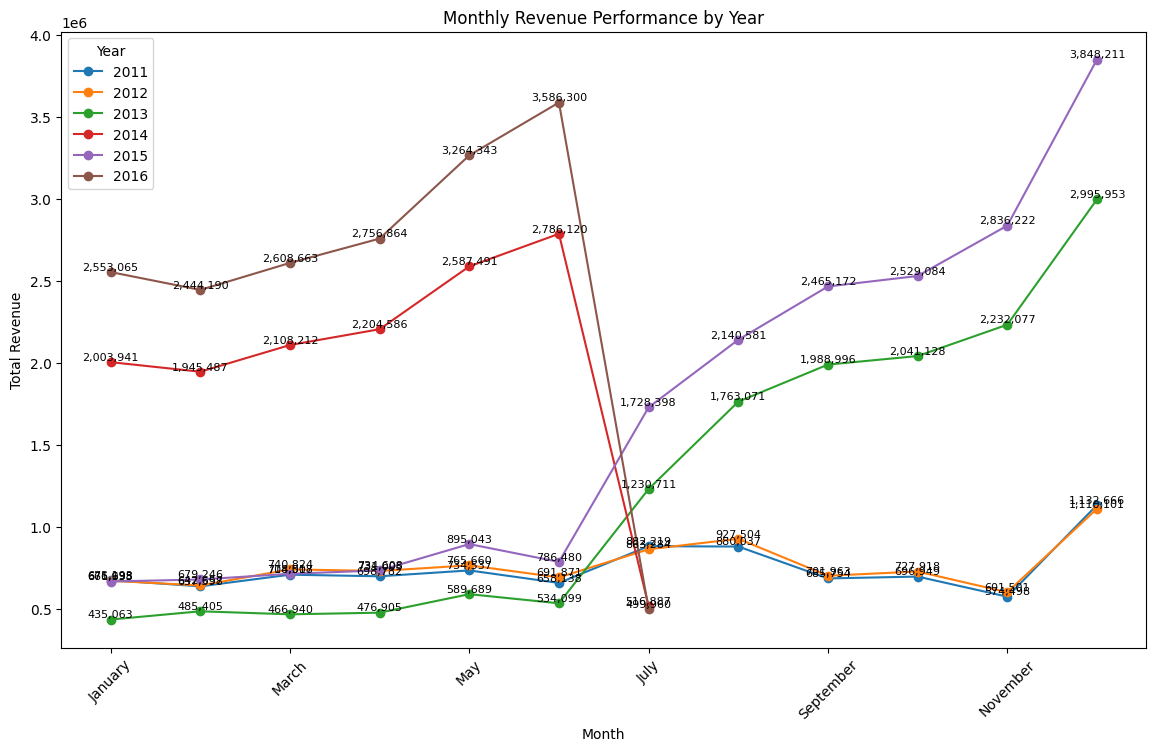

In [43]:
plot_metric(monthly_revenue_pivot, 'Revenue', 'Total Revenue')

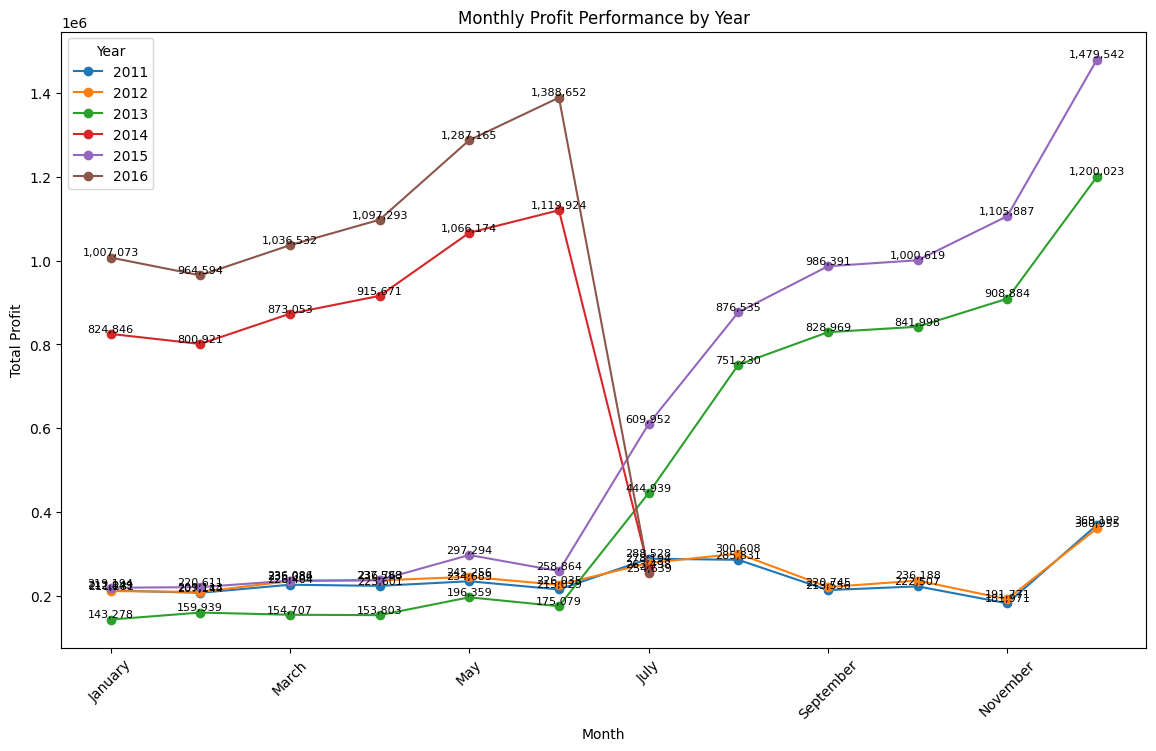

In [44]:
plot_metric(monthly_profit_pivot, 'Profit', 'Total Profit')

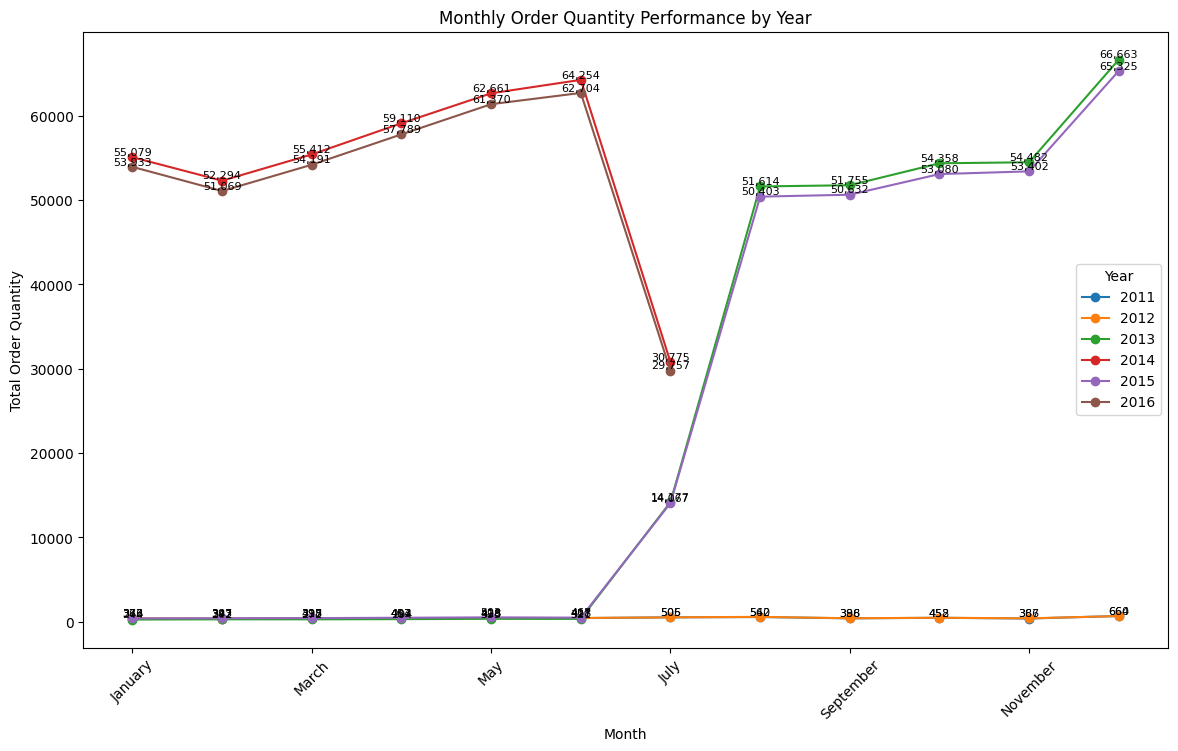

In [45]:
plot_metric(monthly_order_quantity_pivot, 'Order Quantity', 'Total Order Quantity')

In [30]:
product_category_data

,Date,Product_Category,Revenue,Profit,Order_Quantity,Year,Month
0,2011-01-01,Bikes,12821,3225,8,2011,January
1,2011-01-02,Bikes,11868,2925,9,2011,January
2,2011-01-03,Bikes,31175,12174,17,2011,January
3,2011-01-04,Bikes,18909,6240,10,2011,January
4,2011-01-05,Bikes,4675,1644,5,2011,January
...,...,...,...,...,...,...,...
3401,2016-07-29,Clothing,8295,3169,204,2016,July
3402,2016-07-30,Accessories,8591,4995,664,2016,July
3403,2016-07-30,Clothing,6170,1982,179,2016,July
3404,2016-07-31,Accessories,15576,9105,953,2016,July


In [46]:
# Group by 'Year' and 'Product_Category' and calculate the total Revenue, Profit, and Order_Quantity for each
annual_product_category_data = product_category_data.groupby(['Year', 'Product_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

In [58]:
# Function to create grouped bar charts with value annotations
def plot_grouped_bar(data, metric, ylabel):
    plt.figure(figsize=(14, 8))
    
    # Get unique years and categories
    years = sorted(data['Year'].unique())
    categories = data['Product_Category'].unique()
    bar_width = 0.2  # Width of each bar
    
    # Set the position for each year group
    year_index = np.arange(len(years))
    
    # Plot each category
    for i, category in enumerate(categories):
        # Filter data for the current category and ensure it aligns with each year
        category_data = data[data['Product_Category'] == category]
        
        # Match category data with year data by reindexing
        category_data = category_data.set_index('Year').reindex(years).fillna(0).reset_index()
        
        # Align bars for each category in the same year
        bars = plt.bar(year_index + i * bar_width, category_data[metric], width=bar_width, label=category)
        
        # Add value annotations
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval + (yval * 0.01),  # Slightly above the bar
                f'{int(yval):,}',      # Format with commas
                ha='center', 
                va='bottom',
                fontsize=10,
                color='black'
            )
    
    # Labeling and styling
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(f'Annual {metric} by Product Category')
    plt.xticks(year_index + bar_width * (len(categories) - 1) / 2, [str(year) for year in years])  # Center x-ticks
    plt.legend(title='Product Category')
    plt.show()


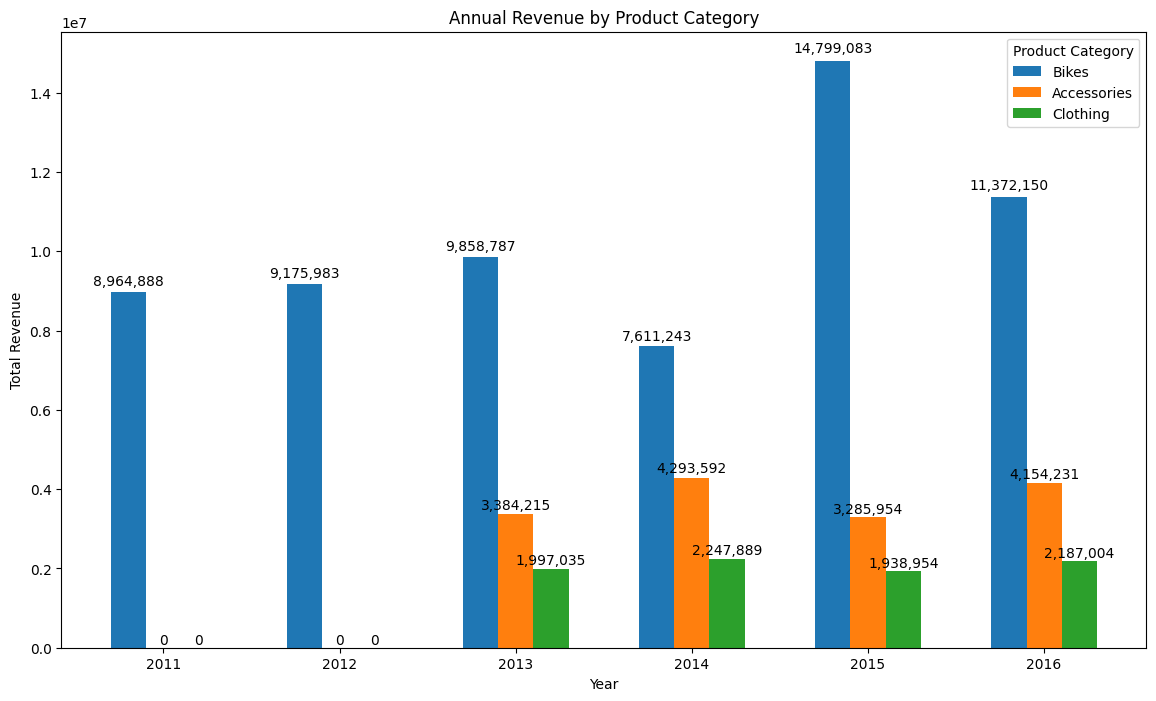

In [59]:
plot_grouped_bar(annual_product_category_data, 'Revenue', 'Total Revenue')

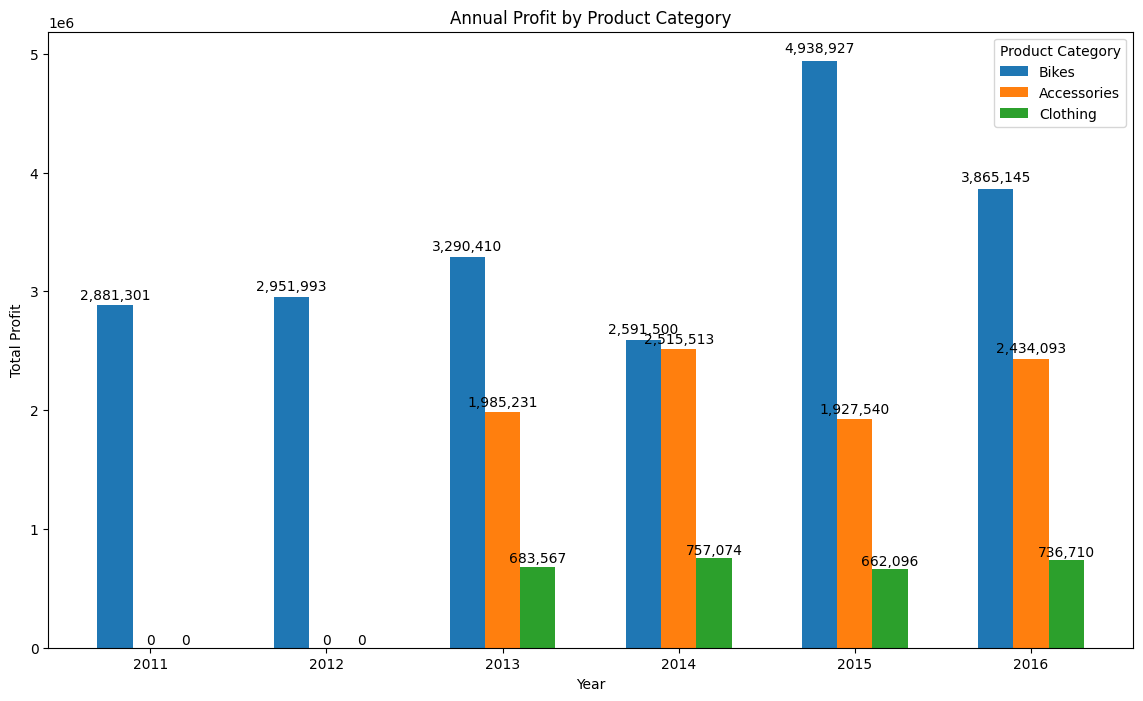

In [60]:
plot_grouped_bar(annual_product_category_data, 'Profit', 'Total Profit')

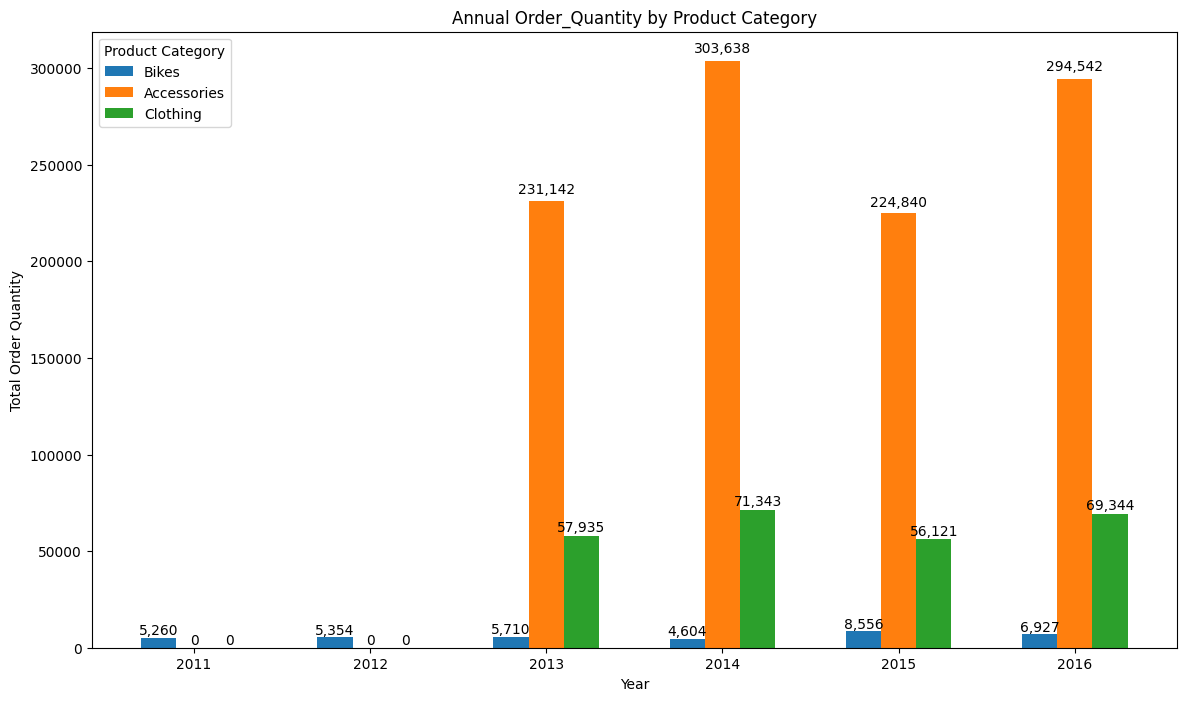

In [61]:
plot_grouped_bar(annual_product_category_data, 'Order_Quantity', 'Total Order Quantity')

In [65]:
# Set 'Date' as index
product_category_data.set_index('Date', inplace=True)

# Resample to monthly frequency, summing Revenue, Profit, and Order_Quantity
monthly_product_category_data = product_category_data.groupby('Product_Category').resample('M').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

monthly_product_category_data

,Product_Category,Date,Revenue,Profit,Order_Quantity
0,Accessories,2013-07-31,165002,96782,10937
1,Accessories,2013-08-31,602629,354079,40962
2,Accessories,2013-09-30,610303,357808,40803
3,Accessories,2013-10-31,612892,359627,42874
4,Accessories,2013-11-30,619205,363373,43380
...,...,...,...,...,...
135,Clothing,2016-03-31,310425,100170,9866
136,Clothing,2016-04-30,342769,119486,10804
137,Clothing,2016-05-31,350738,121598,11257
138,Clothing,2016-06-30,387777,125491,12393


In [66]:
# Function to plot monthly performance metrics
def plot_monthly_metrics(data, metric, ylabel):
    plt.figure(figsize=(14, 8))

    # Get unique product categories
    categories = data['Product_Category'].unique()

    # Plot each category's metric over time
    for category in categories:
        category_data = data[data['Product_Category'] == category]
        plt.plot(category_data['Date'], category_data[metric], label=category)

    # Formatting the plot
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(f'Monthly {metric} by Product Category')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Product Category')
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

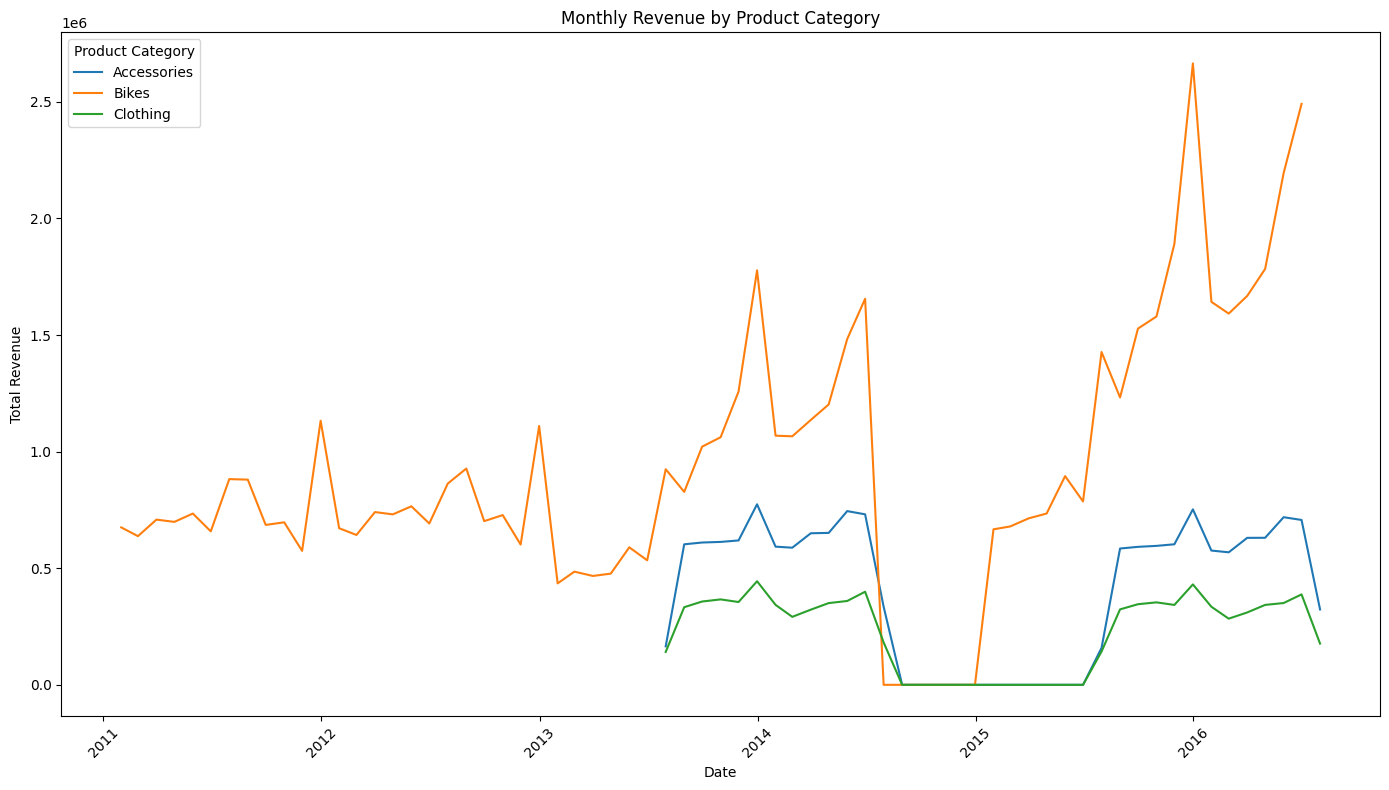

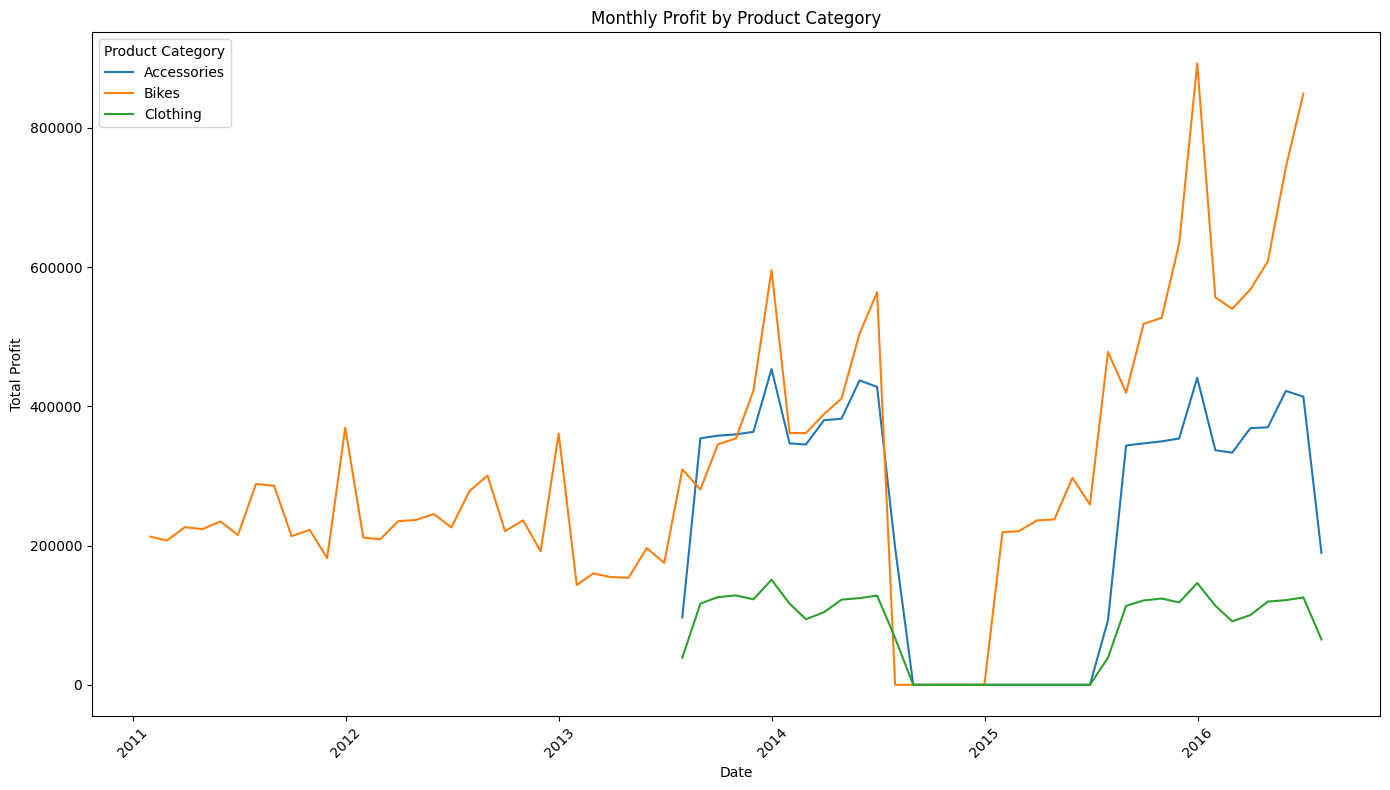

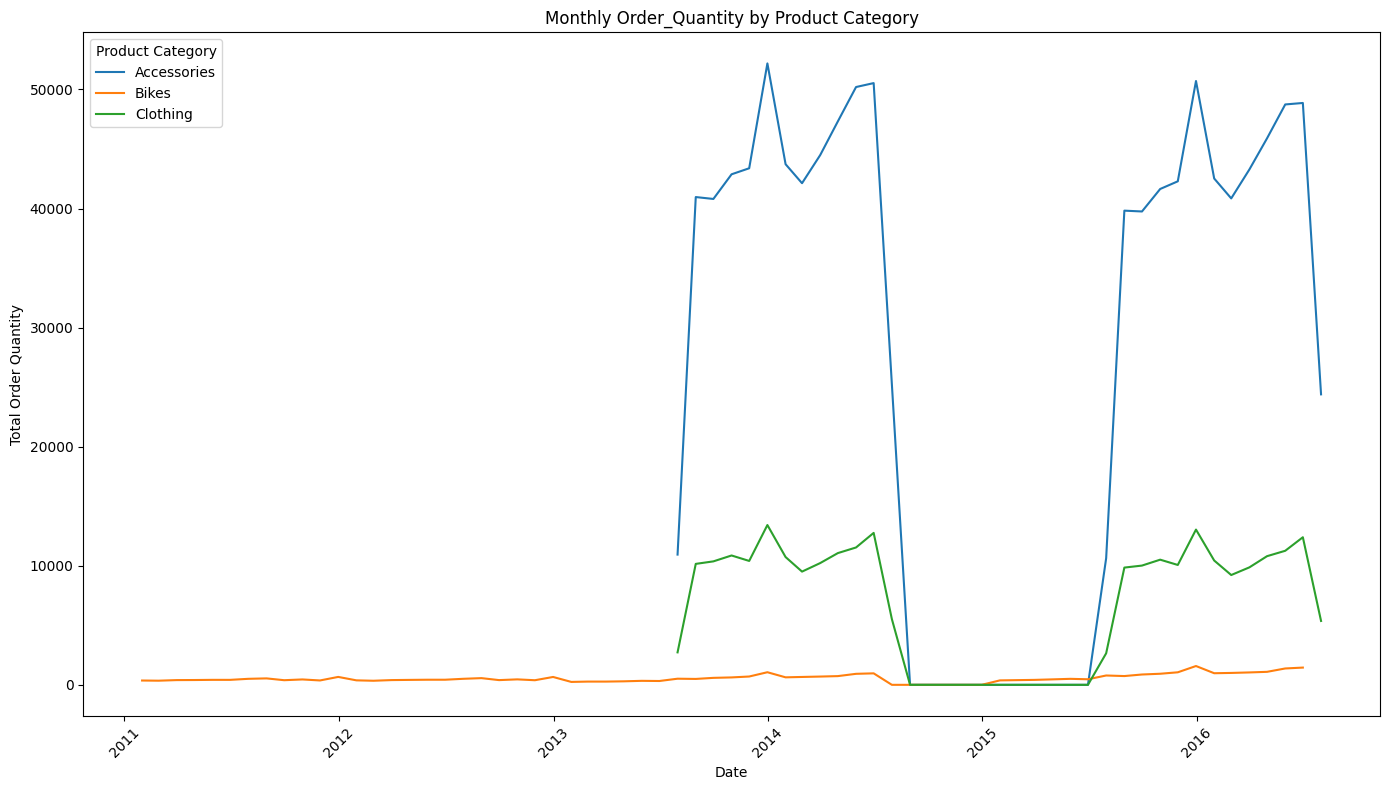

In [68]:
# Plot for Revenue
plot_monthly_metrics(monthly_product_category_data, 'Revenue', 'Total Revenue')

# Plot for Profit
plot_monthly_metrics(monthly_product_category_data, 'Profit', 'Total Profit')

# Plot for Order Quantity
plot_monthly_metrics(monthly_product_category_data, 'Order_Quantity', 'Total Order Quantity')

In [69]:
unique_sub_categories = df.groupby('Product_Category')['Sub_Category'].unique().reset_index()
unique_sub_categories

,Product_Category,Sub_Category
0,Accessories,"[Bike Racks, Bike Stands, Bottles and Cages, C..."
1,Bikes,"[Mountain Bikes, Road Bikes, Touring Bikes]"
2,Clothing,"[Caps, Gloves, Jerseys, Shorts, Socks, Vests]"


In [74]:
# Assuming your DataFrame is named `product_category_data`
total_sales_data = df.groupby(['Product_Category', 'Sub_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Display the aggregated data
total_sales_data

,Product_Category,Sub_Category,Revenue,Profit,Order_Quantity
0,Accessories,Bike Racks,517800,304455,4741
1,Accessories,Bike Stands,344075,201935,2412
2,Accessories,Bottles and Cages,1409174,810598,241726
3,Accessories,Cleaners,198821,115891,27574
4,Accessories,Fenders,1245733,748914,62138
5,Accessories,Helmets,5741081,3380203,181606
6,Accessories,Hydration Packs,990406,572668,19914
7,Accessories,Tires and Tubes,4670902,2727713,514051
8,Bikes,Mountain Bikes,21123526,8160463,11992
9,Bikes,Road Bikes,33363061,10078875,19771


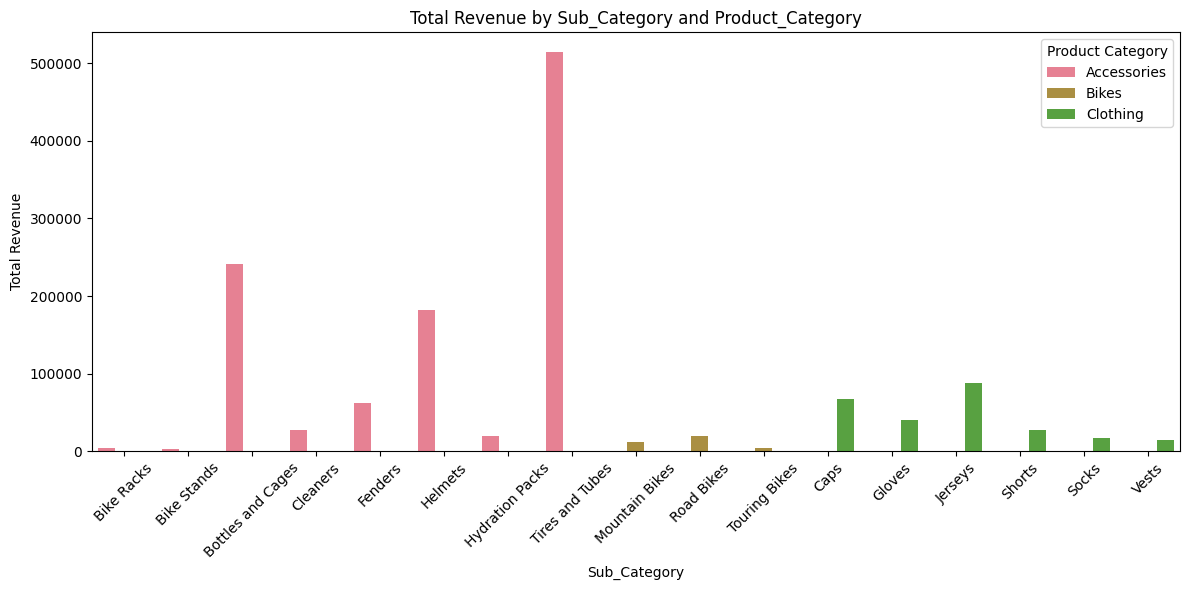

In [77]:
# Set the color palette
sns.set_palette("husl")  # You can choose a different palette

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=total_sales_data, x='Sub_Category', y='Order_Quantity', hue='Product_Category')

# Labeling the plot
plt.title('Total Revenue by Sub_Category and Product_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Product Category')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


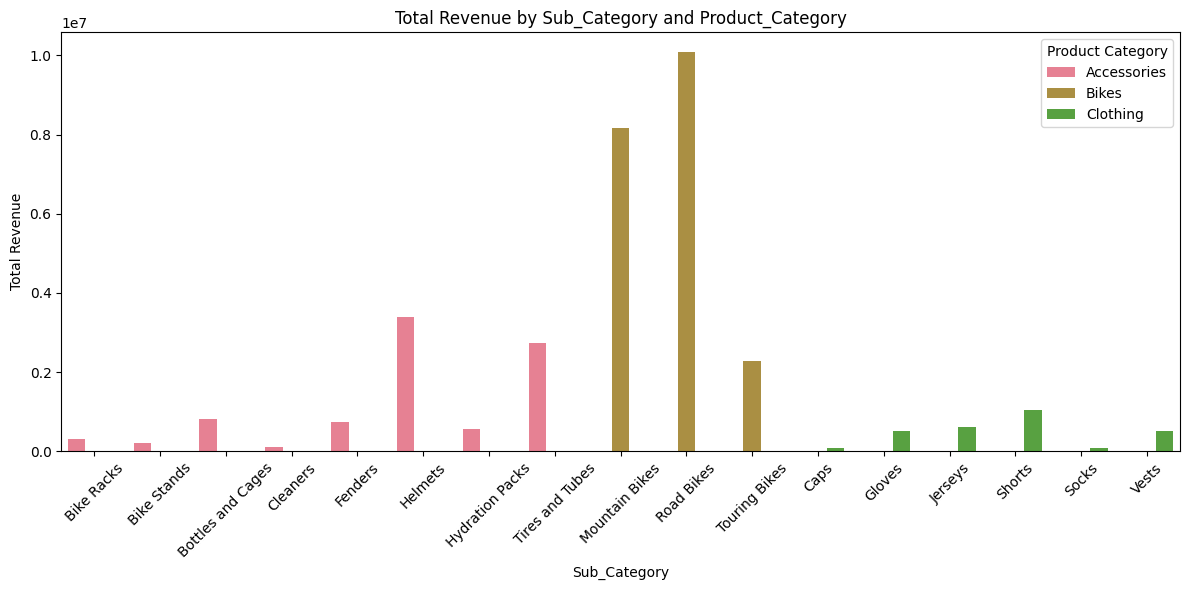

In [76]:
# Set the color palette
sns.set_palette("husl")  # You can choose a different palette

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=total_sales_data, x='Sub_Category', y='Profit', hue='Product_Category')

# Labeling the plot
plt.title('Total Revenue by Sub_Category and Product_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Product Category')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


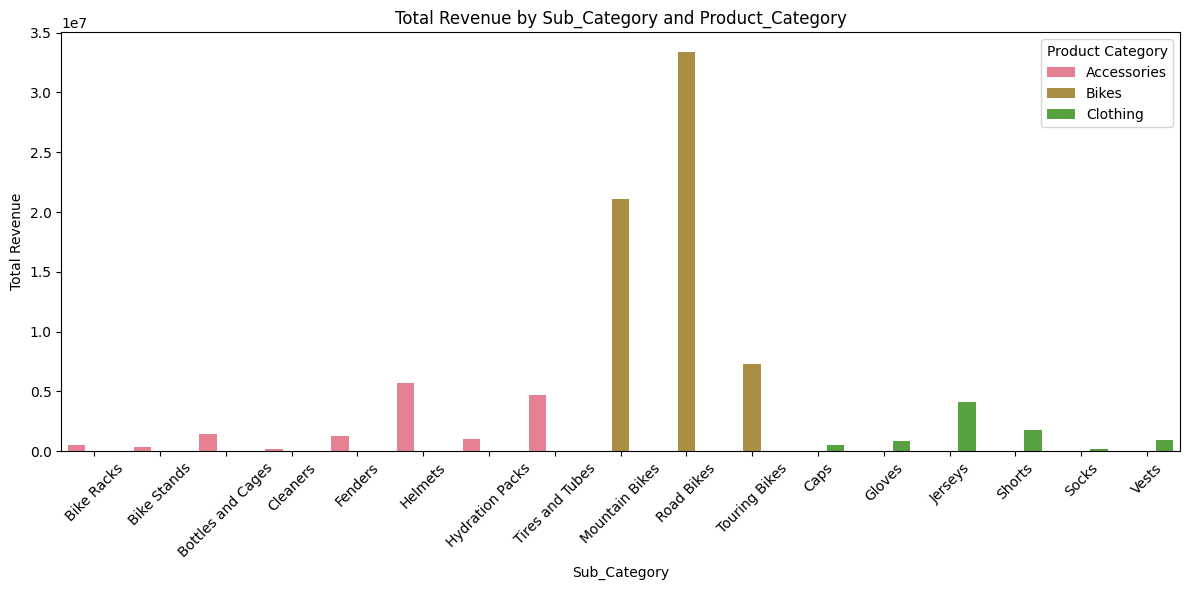

In [75]:
# Set the color palette
sns.set_palette("husl")  # You can choose a different palette

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=total_sales_data, x='Sub_Category', y='Revenue', hue='Product_Category')

# Labeling the plot
plt.title('Total Revenue by Sub_Category and Product_Category')
plt.xlabel('Sub_Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Product Category')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


In [78]:
# Group by Year, Product_Category, and Sub_Category and aggregate the metrics
annual_performance = df.groupby(['Year', 'Product_Category', 'Sub_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Check the resulting DataFrame
annual_performance.head()


,Year,Product_Category,Sub_Category,Revenue,Profit,Order_Quantity
0,2011,Bikes,Mountain Bikes,2198270,834516,1245
1,2011,Bikes,Road Bikes,6766618,2046785,4015
2,2012,Bikes,Mountain Bikes,2182853,831891,1230
3,2012,Bikes,Road Bikes,6993130,2120102,4124
4,2013,Accessories,Bike Racks,112605,65625,1044


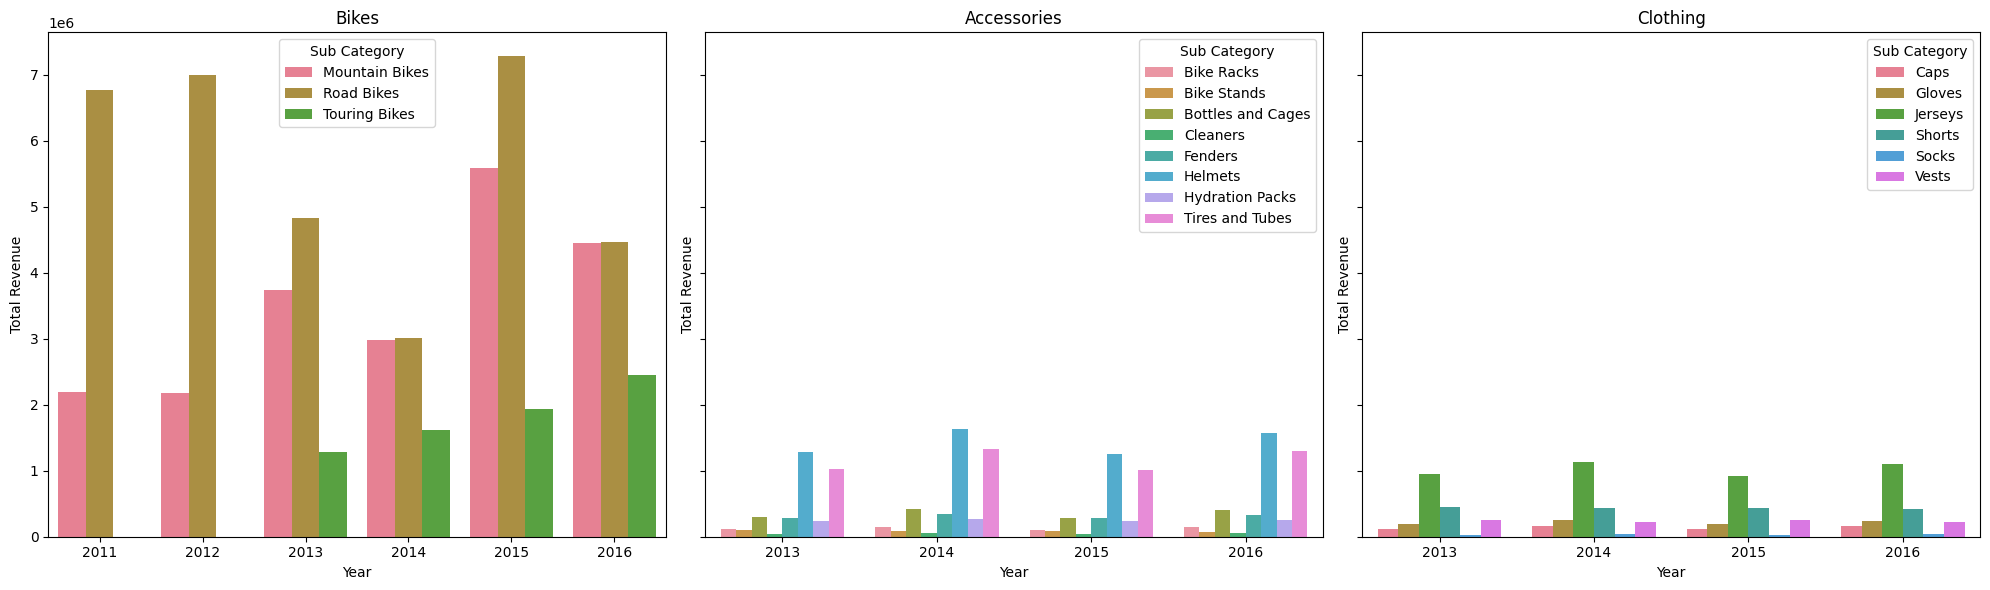

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming annual_performance DataFrame is already created
# Get unique Product Categories
unique_categories = annual_performance['Product_Category'].unique()

# Create a figure with 3 subplots (adjusting number of rows/columns as needed)
fig, axes = plt.subplots(nrows=1, ncols=len(unique_categories), figsize=(20, 6), sharey=True)

# Loop through each unique Product Category and plot in respective subplot
for ax, category in zip(axes, unique_categories):
    # Filter data for the current Product Category
    category_data = annual_performance[annual_performance['Product_Category'] == category]
    
    # Create a bar plot for the current category
    sns.barplot(data=category_data, x='Year', y='Revenue', hue='Sub_Category', ax=ax)
    
    # Set title and labels for each subplot
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Revenue')
    ax.legend(title='Sub Category')

# Adjust layout
plt.tight_layout()
plt.show()


#### **Analysis 4: Low-performing Products**

In [73]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Product_Color,Product_Size,Product_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,unknown,unknown,Hitch Rack - 4-Bike
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,unknown,unknown,Hitch Rack - 4-Bike
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,unknown,unknown,Hitch Rack - 4-Bike
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,unknown,unknown,Hitch Rack - 4-Bike
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,unknown,unknown,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,"Classic Vest, S",3,24,64,112,72,184,unknown,S,Classic Vest
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,unknown,M,Classic Vest
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,unknown,M,Classic Vest
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,64,684,576,1260,unknown,L,Classic Vest


In [8]:
# Products with lowest revenue (Bottom 10)
low_products_revenue = product_performance.sort_values(by='Revenue').head(10)

In [9]:
# Products with lowest profit margins
product_performance['Profit_Margin'] = product_performance['Profit'] / product_performance['Revenue']
low_profit_margin = product_performance.sort_values(by='Profit_Margin').head(10)

low_profit_margin

,Product,Revenue,Profit,Order_Quantity,Profit_Margin
96,"Short-Sleeve Classic Jersey, M",427299,43713,9133,0.102301
95,"Short-Sleeve Classic Jersey, L",503179,64909,10435,0.128998
98,"Short-Sleeve Classic Jersey, XL",447126,58878,9244,0.131681
97,"Short-Sleeve Classic Jersey, S",559237,74389,11544,0.133019
0,AWC Logo Cap,549220,78008,67316,0.142034
19,"Long-Sleeve Logo Jersey, XL",515629,76767,11549,0.148880
18,"Long-Sleeve Logo Jersey, S",493678,79630,10896,0.161299
16,"Long-Sleeve Logo Jersey, L",643544,112342,13979,0.174568
17,"Long-Sleeve Logo Jersey, M",524050,92940,11345,0.177349
72,"Road-350-W Yellow, 44",601328,159464,408,0.265186


#### **Predictive Analytics: Forecast Product Demand (XGBoost)**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed the dataset and created features for demand forecasting
X = df[['Product_Category', 'Order_Quantity', 'Previous_Demand']]
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict future demand
y_pred = model.predict(X_test)


### **2. Customer Division**

This division focuses on customer analysis, including demographics, purchase behavior, and customer lifetime value.

#### **Analysis 1: Customer Age Group and Revenue**

In [10]:
# Revenue and order quantity by age group
age_group_revenue = df.groupby('Age_Group').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)

age_group_revenue

,Age_Group,Revenue,Order_Quantity
0,Adults (35-64),42584153,672417
2,Young Adults (25-34),30655614,446875
3,Youth (<25),11723199,216147
1,Seniors (64+),308042,9877


#### **Analysis 2: Gender-based Buying Behavior**

In [11]:
# Revenue and quantity breakdown by gender
gender_sales = df.groupby('Customer_Gender').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

gender_sales

,Customer_Gender,Revenue,Order_Quantity
0,F,41935599,645733
1,M,43335409,699583


#### **Analysis 3: Customer Country Lifetime Value (CLV)**

In [12]:
# Group by customer to calculate total revenue per customer
clv = df.groupby('Country').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)

clv

,Country,Revenue,Order_Quantity
5,United States,27975547,477539
0,Australia,21302059,263585
4,United Kingdom,10646196,157218
3,Germany,8978596,125720
2,France,8432872,128995
1,Canada,7935738,192259


#### **Predictive Analytics: Forecast Customer Demand (XGBoost)**

In [ ]:
# Using XGBoost to forecast customer demand
X = df[['Age_Group', 'Customer_Gender', 'Order_Quantity']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### **3. Sales and Regional Performance Division**

This division explores sales trends and performance across regions and time to drive location-based strategies.

#### **Analysis 1: Revenue by Region (Country, State)**

In [13]:
# Revenue breakdown by country and state
regional_sales = df.groupby(['Country', 'State']).agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
regional_sales

,Country,State,Revenue,Order_Quantity
33,United States,California,17672620,269759
30,United Kingdom,England,10646196,157218
0,Australia,New South Wales,9203495,115932
6,Canada,British Columbia,7877890,191556
51,United States,Washington,6741510,137947
1,Australia,Queensland,5066267,57592
4,Australia,Victoria,5054839,66231
46,United States,Oregon,3450410,67012
27,Germany,Hessen,2073391,26382
29,Germany,Saarland,2029545,31084


#### **Analysis 2: Monthly and Yearly Sales Trends**

In [14]:
# Revenue trend by year and month
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Revenue': 'sum'
}).reset_index().sort_values(by=['Year', 'Month'])

monthly_sales

,Year,Month,Revenue
0,2011,April,698782
1,2011,August,880037
2,2011,December,1132666
3,2011,February,637598
4,2011,January,675193
...,...,...,...
57,2016,January,2553065
58,2016,July,499960
59,2016,June,3586300
60,2016,March,2608663


In [15]:
# Yearly trend comparison
yearly_sales = df.groupby('Year')['Revenue'].sum().reset_index().sort_values(by='Year')

yearly_sales

,Year,Revenue
0,2011,8964888
1,2012,9175983
2,2013,15240037
3,2014,14152724
4,2015,20023991
5,2016,17713385


#### **Analysis 3: Sales Growth Rate by Region**

In [16]:
# Calculate growth rate for each country/state
df['Year'] = pd.to_datetime(df['Date']).dt.year
growth_rate_region = df.groupby(['Country', 'State', 'Year']).agg({
    'Revenue': 'sum'
}).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
growth_rate_region

,Country,State,Year,Revenue
250,United States,Washington,2011,1359.288732
188,United States,California,2011,266.435721
232,United States,Oregon,2011,150.482051
36,Canada,British Columbia,2011,100.276359
204,United States,Illinois,2013,66.647059
...,...,...,...,...
238,United States,South Carolina,2014,-0.999057
194,United States,Florida,2013,-0.999201
42,Canada,Ontario,2013,-0.999664
182,United States,Alabama,2013,-0.999981


#### **Predictive Analytics: Revenue Forecasting (XGBoost)**

In [ ]:
# Forecast future regional sales using XGBoost
X = df[['Country', 'State', 'Order_Quantity']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### **4. Profitability and Cost Efficiency Division**

This division dives into profit generation and cost efficiency across different business areas.

#### **Analysis 1: Profit by Product Category and Sub-category**

In [17]:
# Profit breakdown by product category and sub-category
profitability_category = df.groupby(['Product_Category', 'Sub_Category']).agg({
    'Profit': 'sum'
}).reset_index().sort_values(by='Profit', ascending=False)
profitability_category

,Product_Category,Sub_Category,Profit
9,Bikes,Road Bikes,10078875
8,Bikes,Mountain Bikes,8160463
5,Accessories,Helmets,3380203
7,Accessories,Tires and Tubes,2727713
10,Bikes,Touring Bikes,2279938
14,Clothing,Shorts,1034342
2,Accessories,Bottles and Cages,810598
4,Accessories,Fenders,748914
13,Clothing,Jerseys,603568
6,Accessories,Hydration Packs,572668


#### **Analysis 2: Profit Margins by Product**

In [18]:
# Profit margin calculation
df['Profit_Margin'] = df['Profit'] / df['Revenue']
profit_margin_by_product = df.groupby('Product').agg({
    'Profit_Margin': 'mean'
}).reset_index().sort_values(by='Profit_Margin', ascending=False)
profit_margin_by_product

,Product,Profit_Margin
56,Road Tire Tube,0.722138
53,"Racing Socks, L",0.630829
54,"Racing Socks, M",0.629262
55,Road Bottle Cage,0.625271
21,ML Road Tire,0.597989
...,...,...
0,AWC Logo Cap,0.134941
98,"Short-Sleeve Classic Jersey, XL",0.127554
95,"Short-Sleeve Classic Jersey, L",0.125274
97,"Short-Sleeve Classic Jersey, S",0.124321


#### **Analysis 3: Cost Efficiency by Region**

In [19]:
# Cost efficiency analysis by country and state
regional_cost_efficiency = df.groupby(['Country', 'State']).agg({
    'Cost': 'sum',
    'Revenue': 'sum'
}).reset_index()
regional_cost_efficiency['Cost_Efficiency'] = regional_cost_efficiency['Revenue'] / regional_cost_efficiency['Cost']
regional_cost_efficiency

,Country,State,Cost,Revenue,Cost_Efficiency
0,Australia,New South Wales,6069811,9203495,1.516274
1,Australia,Queensland,3447109,5066267,1.469715
2,Australia,South Australia,972435,1397274,1.436882
3,Australia,Tasmania,409861,580184,1.415563
4,Australia,Victoria,3626813,5054839,1.393741
5,Canada,Alberta,33453,56803,1.697994
6,Canada,British Columbia,4184542,7877890,1.882617
7,Canada,Ontario,447,1045,2.337808
8,France,Charente-Maritime,60047,106047,1.766067
9,France,Essonne,579684,973532,1.679418


#### **Prescriptive Analytics: Operational and Strategic Recommendations**

### **5. Market Segmentation Division**

This division helps break down the market into meaningful segments for better product positioning and marketing strategies.

#### **Analysis 1: Market Segmentation by Age and Gender**

In [20]:
# Segmentation by age and gender
segment_sales = df.groupby(['Age_Group', 'Customer_Gender']).agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()
segment_sales

,Age_Group,Customer_Gender,Revenue,Order_Quantity
0,Adults (35-64),F,21269149,328479
1,Adults (35-64),M,21315004,343938
2,Seniors (64+),F,130050,4506
3,Seniors (64+),M,177992,5371
4,Young Adults (25-34),F,15194242,214441
5,Young Adults (25-34),M,15461372,232434
6,Youth (<25),F,5342158,98307
7,Youth (<25),M,6381041,117840


#### **Analysis 2: BCG Matrix for Product Categories**

In [21]:
# BCG matrix analysis for product categories
total_revenue = df['Revenue'].sum()
category_performance = df.groupby('Product_Category').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Market share calculation
category_performance['Market_Share'] = category_performance['Revenue'] / total_revenue
category_performance

,Product_Category,Revenue,Order_Quantity,Market_Share
0,Accessories,15117992,1054162,0.177293
1,Bikes,61782134,36411,0.724539
2,Clothing,8370882,254743,0.098168


In [ ]:
# Calculate Total Revenue per Product Category/Sub-Category
## Group by Product Category or Sub-Category and calculate total revenue
category_revenue = df.groupby('Product_Category')['Revenue'].sum().reset_index()
category_revenue.columns = ['Product_Category', 'Total_Revenue']

# Calculate Market Share
## Calculate total market revenue
total_market_revenue = category_revenue['Total_Revenue'].sum()

## Calculate market share for each category
category_revenue['Market_Share'] = (category_revenue['Total_Revenue'] / total_market_revenue) * 100

# Calculate Market Growth Rate
## Group by Product Category and Year to calculate annual revenue
yearly_revenue = df.groupby(['Year', 'Product_Category'])['Revenue'].sum().reset_index()

## Calculate year-over-year growth for each category
yearly_revenue['Revenue_Growth'] = yearly_revenue.groupby('Product_Category')['Revenue'].pct_change() * 100

# Calculate Relative Market Share
## Find the category with the largest market share
max_market_share = category_revenue['Market_Share'].max()

## Calculate relative market share for each category
category_revenue['Relative_Market_Share'] = category_revenue['Market_Share'] / max_market_share

# Classify Products into BCG Matrix Categories
# Stars: High growth, high market share (market share > 1 and growth rate > market average)
# Cash Cows: Low growth, high market share (market share > 1 and growth rate < market average)
# Question Marks: High growth, low market share (market share < 1 and growth rate > market average)
# Dogs: Low growth, low market share (market share < 1 and growth rate < market average)
## Define average market growth rate for classification
average_growth_rate = yearly_revenue['Revenue_Growth'].mean()

## Classify each category
category_revenue['BCG_Category'] = category_revenue.apply(
    lambda row: 'Star' if row['Relative_Market_Share'] > 1 and row['Revenue_Growth'] > average_growth_rate else
                'Cash Cow' if row['Relative_Market_Share'] > 1 and row['Revenue_Growth'] <= average_growth_rate else
                'Question Mark' if row['Relative_Market_Share'] < 1 and row['Revenue_Growth'] > average_growth_rate else
                'Dog',
    axis=1
)

import matplotlib.pyplot as plt

# Visualize the BCG Matrix
## Plot BCG matrix
plt.figure(figsize=(10, 6))
for category in category_revenue['BCG_Category'].unique():
    subset = category_revenue[category_revenue['BCG_Category'] == category]
    plt.scatter(subset['Relative_Market_Share'], subset['Revenue_Growth'], label=category, s=subset['Total_Revenue'] * 0.01)

plt.title('BCG Matrix')
plt.xlabel('Relative Market Share')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.show()


#### **Analysis 3: Product Category Market Share and Growth**

In [22]:
# Growth rate calculation year-over-year for product categories
category_growth = df.groupby(['Product_Category', 'Year']).agg({
    'Revenue': 'sum'
}).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
category_growth

,Product_Category,Year,Revenue
4,Bikes,2011,1.158014
8,Bikes,2015,0.944371
1,Accessories,2014,0.268711
3,Accessories,2016,0.264239
13,Clothing,2016,0.127930
11,Clothing,2014,0.125613
6,Bikes,2013,0.074412
5,Bikes,2012,0.023547
12,Clothing,2015,-0.137433
7,Bikes,2014,-0.227974


## DRAFT

### 1. **Product Division** (Analyzing Product Performance)

This division focuses on understanding the performance of various products and product categories to guide inventory, marketing, and development strategies.

#### **Analysis 1: Top-selling Products by Revenue and Profit**
- Insight: Identify top-performing products to focus on.
   ```python
   top_products_revenue = product_performance.sort_values(by='Revenue', ascending=False).head(10)
   top_products_profit = product_performance.sort_values(by='Profit', ascending=False).head(10)
   ```

#### **Analysis 2: Product Category and Sub-category Performance**
- Insight: Understand the contributions of different product categories and sub-categories to revenue and profit.
   ```python
   category_performance = df.groupby(['Product_Category', 'Sub_Category']).agg({
       'Revenue': 'sum', 'Profit': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 3: Low-performing Products**
- Insight: Identify underperforming products to either improve or discontinue.
   ```python
   low_products_revenue = product_performance.sort_values(by='Revenue').head(10)
   low_profit_margin = product_performance.sort_values(by='Profit_Margin').head(10)
   ```

#### **Predictive Analytics: Forecast Product Demand (XGBoost)**
- Insight: Use XGBoost to forecast demand for specific product categories.
   ```python
   # Forecast demand for Accessories, Bikes, and Clothing using XGBoost
   ```

### 2. **Customer Division** (Understanding Customer Demographics and Behavior)

This division focuses on customer analysis, including demographics, purchase behavior, and customer lifetime value.

#### **Analysis 1: Customer Age Group and Revenue**
- Insight: Understand which age groups are driving sales.
   ```python
   age_group_revenue = df.groupby('Age_Group').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 2: Gender-based Buying Behavior**
- Insight: Compare male and female customers' buying behavior.
   ```python
   gender_sales = df.groupby('Customer_Gender').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index()
   ```

#### **Analysis 3: Customer Lifetime Value (CLV)**
- Insight: Identify the most valuable customers.
   ```python
   clv = df.groupby('Customer_ID').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Predictive Analytics: Forecast Customer Demand (XGBoost)**
- Insight: Use XGBoost to forecast customer purchasing behavior and demand.
   ```python
   # Forecast customer demand based on historical behavior
   ```


### 3. **Sales and Regional Performance Division**

This division explores sales trends and performance across regions and time to drive location-based strategies.

#### **Analysis 1: Revenue by Region (Country, State)**
- Insight: Identify top-performing regions to allocate resources effectively.
   ```python
   regional_sales = df.groupby(['Country', 'State']).agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 2: Monthly and Yearly Sales Trends**
- Insight: Analyze sales patterns over time to spot trends and predict seasonality.
   ```python
   monthly_sales = df.groupby(['Year', 'Month']).agg({
       'Revenue': 'sum'
   }).reset_index().sort_values(by=['Year', 'Month'])
   ```

#### **Analysis 3: Sales Growth Rate by Region**
- Insight: Calculate and monitor growth rate by region to identify expansion opportunities.
   ```python
   growth_rate_region = df.groupby(['Country', 'State', 'Year']).agg({
       'Revenue': 'sum'
   }).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Predictive Analytics: Revenue Forecasting (XGBoost)**
- Insight: Use XGBoost to forecast future revenue by region.
   ```python
   # Predict future regional sales using XGBoost
   ```


### 4. **Profitability and Cost Efficiency Division**

This division dives into profit generation and cost efficiency across different business areas.

#### **Analysis 1: Profit by Product Category and Sub-category**
- Insight: Identify which product categories generate the highest profit.
   ```python
   profitability_category = df.groupby(['Product_Category', 'Sub_Category']).agg({
       'Profit': 'sum'
   }).reset_index().sort_values(by='Profit', ascending=False)
   ```

#### **Analysis 2: Profit Margins by Product**
- Insight: Calculate the profit margin for each product to determine efficiency.
   ```python
   profit_margin_by_product = df.groupby('Product').agg({
       'Profit_Margin': 'mean'
   }).reset_index().sort_values(by='Profit_Margin', ascending=False)
   ```

#### **Analysis 3: Cost Efficiency by Region**
- Insight: Analyze how cost-efficient different regions are in terms of revenue generated vs. cost.
   ```python
   regional_cost_efficiency = df.groupby(['Country', 'State']).agg({
       'Cost': 'sum', 'Revenue': 'sum'
   }).reset_index()
   regional_cost_efficiency['Cost_Efficiency'] = regional_cost_efficiency['Revenue'] / regional_cost_efficiency['Cost']
   ```

#### **Prescriptive Analytics: Operational and Strategic Recommendations**
- Insight: Use profitability and forecast insights to recommend actions on staffing, marketing, and product management.
   ```python
   # Recommend resource allocation based on profitability and growth forecasts
   ```

### 5. **Market Segmentation Division**

This division helps break down the market into meaningful segments for better product positioning and marketing strategies.

#### **Analysis 1: Market Segmentation by Age and Gender**
- Insight: Segment customers by demographic groups to understand how different segments contribute to overall sales.
   ```python
   segment_sales = df.groupby(['Age_Group', 'Customer_Gender']).agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index()
   ```

#### **Analysis 2: BCG Matrix for Product Categories**
- Insight: Classify product categories into **Stars**, **Cash Cows**, **Dogs**, and **Question Marks** to guide strategic focus.
   ```python
   # BCG matrix for product categories based on revenue and growth rate
   ```

#### **Analysis 3: Product Category Market Share and Growth**
- Insight: Calculate market share and growth rate for each product category.
   ```python
   category_growth = df.groupby(['Product_Category', 'Year']).agg({
       'Revenue': 'sum'
   }).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
   ```
